<a href="https://colab.research.google.com/github/hhshanto/Dog-Breed-Identification/blob/main/Dog_Breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End to end multiclass dog breed classification
This Notebook builds an end to end multiclass image classifier using TensorFlow 2.0 and TensorFlow Hub

## 1. Problem
Identifying the breed of a dog given and image of a dog.
## 2. Data
The data is available on Kaggle:
https://www.kaggle.com/c/dog-breed-identification/data
## 3. Evaluation
Submissions are evaluated on **Multi Class Log Loss** between the predicted probability and the observed target.
## 4. Features
Info about data:
* 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Get our workspace ready

* Import TensorFlow Hub
* Make sure to use GPU

In [1]:
 # Import necessary tools
 import tensorflow as tf
 import tensorflow_hub as hub
 print("TF version:", hub.__version__)

 # Checking GPU availability
 print("GPU", "available (Yess!!)" if tf.config.list_physical_devices("GPU") else "not available")

TF version: 0.12.0
GPU available (Yess!!)


## Getting our data ready (Turning it into tensors)
Image to numerical representation.

# The Lables

In [3]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Breed/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     688b70ee890696dbb745347a8b682ac3  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [4]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


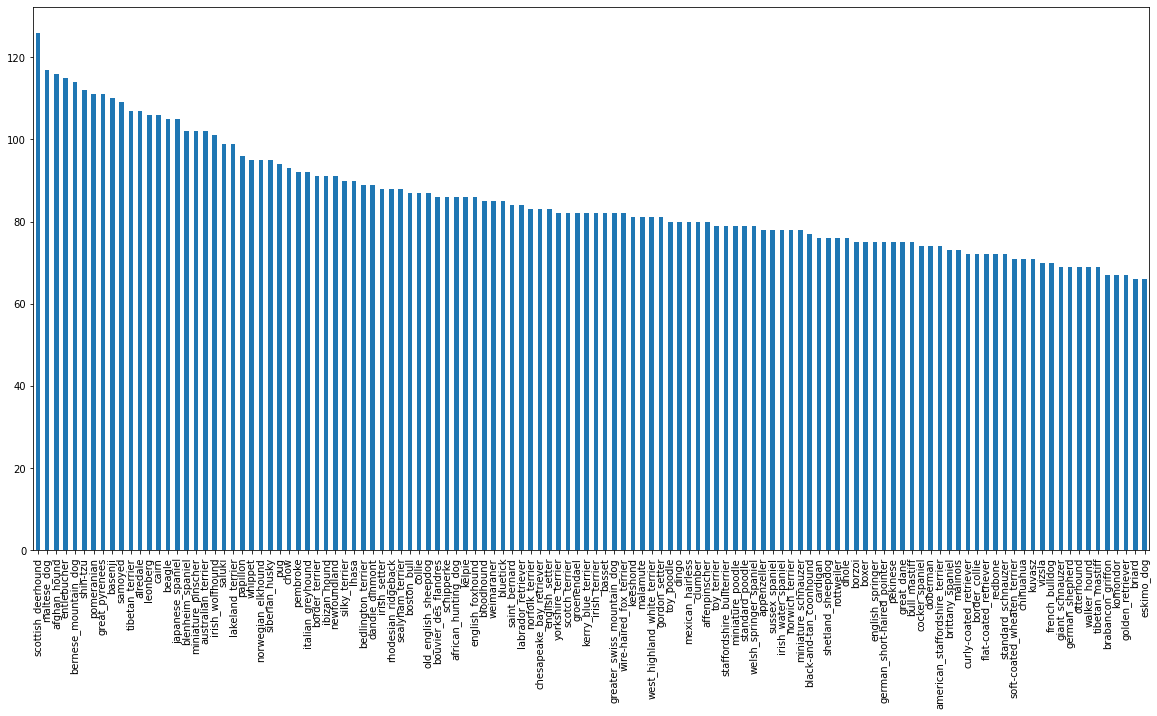

In [6]:
# How many images of each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

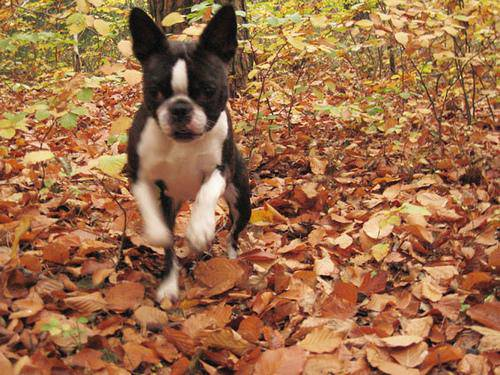

In [9]:
# Vieweing image
from IPython.display import Image
Image("/content/drive/MyDrive/Dog Breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Getting images and their labels

In [16]:
# create pathnames from image ID's
filenames = ["drive/MyDrive/Dog Breed/train/" + fname + ".jpg" for fname in labels_csv["id"]]

#check the first 10
filenames[:10]

['drive/MyDrive/Dog Breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [17]:
import os
if len(os.listdir("drive/MyDrive/Dog Breed/train")) == len(filenames):
  print("Matched")
else:
  print("Does not match")

Matched


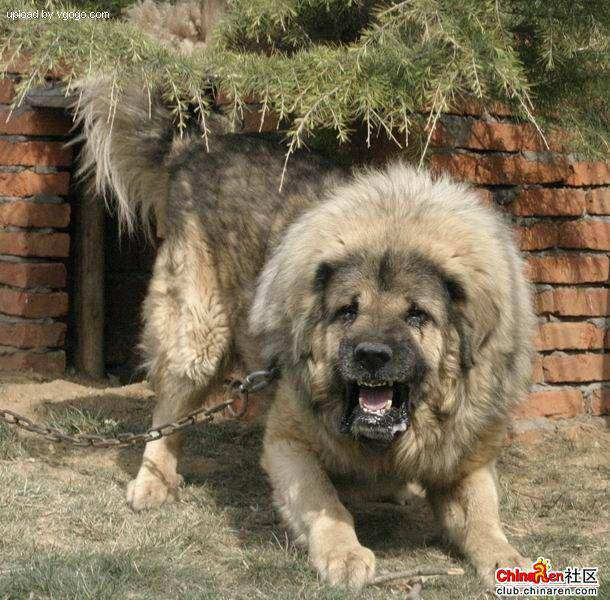

In [19]:
Image(filenames[9000])